# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unites = "imperial"

query_url = f"{url}appid={api_key}&units&q="
print(query_url)

cityname = []
countryname = []
latitude = []
longitude = []
maxtemp = []
humidity = []
cloudiness = []
date = []
windspeed = []


http://api.openweathermap.org/data/2.5/weather?appid=59166562bfec44e3e627176a07991947&units&q=


In [4]:
count = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    
    try:

        if (count > 500):
            break
        response = requests.get(f"{query_url}{city}").json()
        cityname.append(response["name"])
        countryname.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windspeed.append(response["wind"]["speed"])
        
        print(f"Processing data for City {count} ~ {city}")
        count += 1
        
        # wait for a second to avoid blocking the calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, moving on!")
        
    continue

Beginning Data Retrieval
-----------------------------
Processing data for City 1 ~ vila franca do campo
Processing data for City 2 ~ mataura
teul not found, moving on!
grand river south east not found, moving on!
Processing data for City 3 ~ buraydah
Processing data for City 4 ~ east london
Processing data for City 5 ~ pingliang
Processing data for City 6 ~ calabozo
Processing data for City 7 ~ lorengau
Processing data for City 8 ~ erdenet
Processing data for City 9 ~ hilo
Processing data for City 10 ~ kirkenes
Processing data for City 11 ~ vaini
Processing data for City 12 ~ hithadhoo
Processing data for City 13 ~ lavrentiya
Processing data for City 14 ~ zhanjiang
Processing data for City 15 ~ jamestown
taolanaro not found, moving on!
Processing data for City 16 ~ porto novo
Processing data for City 17 ~ aljezur
Processing data for City 18 ~ ushuaia
Processing data for City 19 ~ leh
Processing data for City 20 ~ pinerolo
Processing data for City 21 ~ komsomolskiy
Processing data for 

Processing data for City 192 ~ lata
attawapiskat not found, moving on!
Processing data for City 193 ~ trincomalee
Processing data for City 194 ~ palauig
ayios kirikos not found, moving on!
Processing data for City 195 ~ verkhnevilyuysk
Processing data for City 196 ~ sioux lookout
Processing data for City 197 ~ baherden
Processing data for City 198 ~ balkanabat
Processing data for City 199 ~ provideniya
Processing data for City 200 ~ saint anthony
Processing data for City 201 ~ sparks
Processing data for City 202 ~ skibbereen
Processing data for City 203 ~ klaksvik
Processing data for City 204 ~ port hardy
Processing data for City 205 ~ atherton
Processing data for City 206 ~ mutsu
Processing data for City 207 ~ barbosa
Processing data for City 208 ~ laguna
Processing data for City 209 ~ ronda
Processing data for City 210 ~ yulara
Processing data for City 211 ~ brakel
Processing data for City 212 ~ balaipungut
Processing data for City 213 ~ montego bay
Processing data for City 214 ~ ahi

Processing data for City 375 ~ yolombo
Processing data for City 376 ~ krutinka
Processing data for City 377 ~ hami
Processing data for City 378 ~ te anau
nguiu not found, moving on!
Processing data for City 379 ~ nizwa
Processing data for City 380 ~ liverpool
Processing data for City 381 ~ mayor pablo lagerenza
porto santo not found, moving on!
Processing data for City 382 ~ buenos aires
Processing data for City 383 ~ vanimo
Processing data for City 384 ~ nanortalik
Processing data for City 385 ~ marsa matruh
Processing data for City 386 ~ drayton valley
Processing data for City 387 ~ harlingen
Processing data for City 388 ~ mastic beach
Processing data for City 389 ~ isangel
Processing data for City 390 ~ saint-pierre
Processing data for City 391 ~ torrevieja
Processing data for City 392 ~ pacific grove
Processing data for City 393 ~ todos santos
Processing data for City 394 ~ coruripe
Processing data for City 395 ~ wollongong
Processing data for City 396 ~ acari
Processing data for C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {
    "City": cityname,
    "Cloudiness": cloudiness, 
    "Country": countryname,
    "Date": date, 
    "Humidity": humidity,
    "Latitude": latitude, 
    "Longitude": longitude, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}

weather_df = pd.DataFrame(weather)
weather_df.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Vila Franca do Campo,20,PT,1570170485,94,37.72,-25.43,293.710,5.70
1,Mataura,99,NZ,1570170486,55,-46.19,168.86,288.710,6.26
2,Buraydah,0,SA,1570170488,33,26.33,43.97,303.150,5.70
3,East London,75,ZA,1570170489,77,-33.02,27.91,291.150,2.60
4,Pingliang,99,CN,1570170490,74,35.54,106.68,284.839,2.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
area = (30 * np.random.rand(len(weather_df)))**2
colors = np.random.rand(len(weather_df))

#### Latitude vs. Temperature Plot

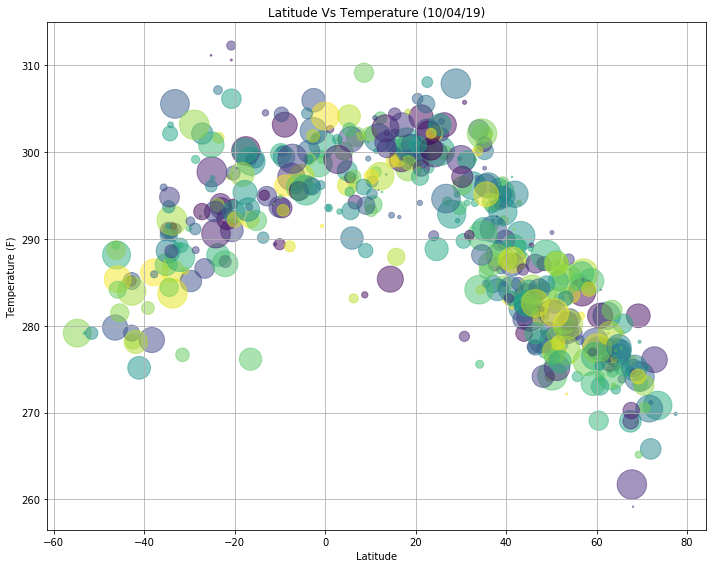

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

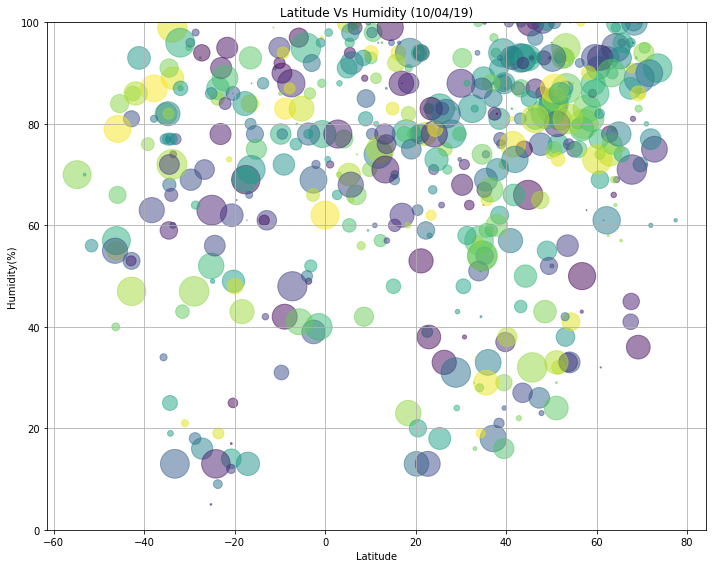

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)


plt.tight_layout()
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

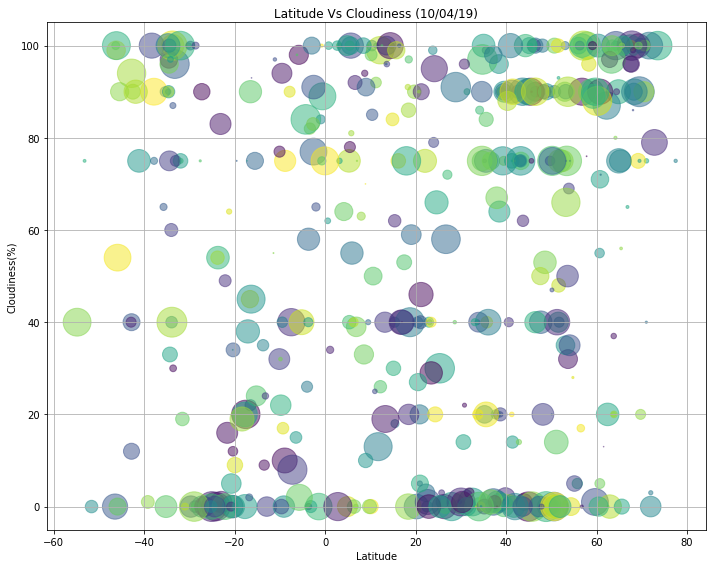

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

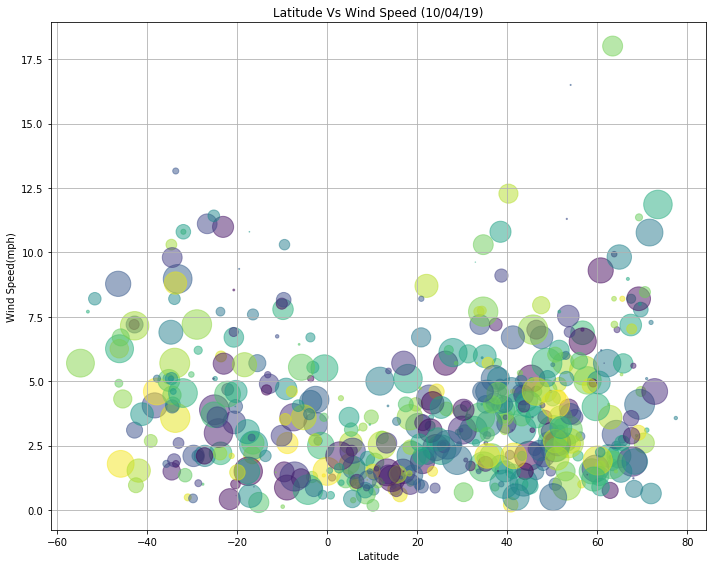

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()